In [1]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
#path_ME_data = "../../READOUT_MASTER_EQUATION/data/PPLT_tmax799_Nq2_Nc4_amp0.0020_kappa0.0100_wq5.0000_anh15915494.1500_wc5.5000_wd5.5000_ms1e-03_dimexp70_qb[1]_00_TRSM0.d"
#pplt_me_ad002=np.loadtxt( path_ME_data )

path1 = '../../data_fortran/MPOL_DCT_85/data/'
paramchar_ad037 = "nl2_wc5.500_n2_50_E0.10E-09_dtadd1.65_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.037_anh159.155_dt0.0100_errl0.1E-03_qb1_cv0.0_tmax80"
dyn_ad037 = da.dynamics(2,path1, paramchar_ad037)
paramchar_ad037_n1= "nl2_wc5.500_n1_1_E0.10E-09_dtadd0.85_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.037_anh159.155_dt0.0100_errl0.1E-03_qb1_cv0.0_tmax80"
dyn_ad037_n1 = da.dynamics(2,path1, paramchar_ad037_n1)
paramchar_ad002_n2 = "nl2_wc5.500_n2_2_E0.10E-08_dtadd0.01_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.002_anh159.155_dt0.0050_errl0.1E-03_qb1_cv0.0_tmax80"
dyn_ad002_n2 = da.dynamics(2,path1, paramchar_ad002_n2)
paramchar_cal_cav1 = "nl2_wc5.500_n1_1_E0.10E-09_dtadd0.85_ar0.0_wq5.000_g0.000_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.000_anh159.155_dt0.0100_errl0.1E-03_qb1_cv1.0_tmax80"
dyn_cal_cav1 = da.dynamics(2,path1, paramchar_cal_cav1)

path2 = '../../data_fortran/MPOL_DCT_89/data/'
paramchar_ad026 = "nl2_wc5.500_n2_40_E0.10E-08_dtadd1.70_2.06_12_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.026_anh159.155_dt0.0100_errl0.1E-03_qb1_cv0.0_tmax80"
dyn_ad026 = da.dynamics(2,path2, paramchar_ad026)
paramchar_ad026_n1 = "nl2_wc5.500_n1_1_E0.10E-09_dtadd1.10_1.79_12_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad0.026_anh159.155_dt0.0100_errl0.1E-03_qb1_cv0.0_tmax80"
dyn_ad026_n1 = da.dynamics(2,path2, paramchar_ad026_n1)

## Decay rate calibration

-- fitted decay rate/(2*np.pi) = 0.009983833941564886 GHz


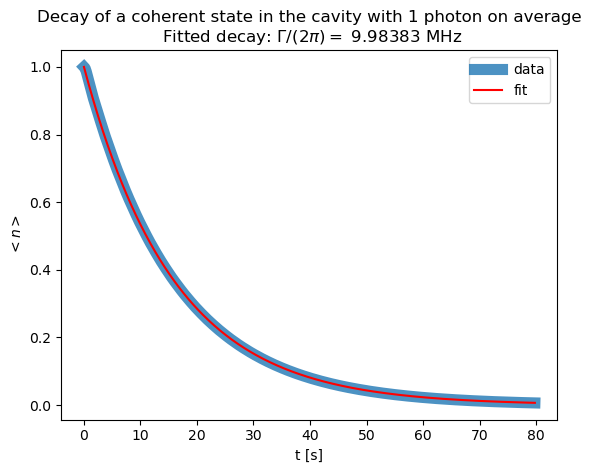

In [3]:
from scipy.optimize import curve_fit

def exp_decay(t,gamma):
    return np.exp( -gamma*t )

opt, _ = curve_fit( exp_decay, dyn_cal_cav1.times, dyn_cal_cav1.nk[:,0] )
Gamma=opt[0]
print( '-- fitted decay rate/(2*np.pi) =', Gamma/(2*np.pi), "GHz" )

plt.plot( dyn_cal_cav1.times[1:], dyn_cal_cav1.nk[1:,0], linewidth=8, alpha=0.8,label='data'  )
plt.plot( dyn_cal_cav1.times[1:], exp_decay( dyn_cal_cav1.times[1:], opt[0]), c='red', label='fit'  )
plt.ylabel( "$<n>$" )
plt.xlabel('t [s]')
plt.title('Decay of a coherent state in the cavity with 1 photon on average\n Fitted decay: $\Gamma/(2\pi)=$ '+str(np.round(1e3*Gamma/(2*np.pi),5))+' MHz')
plt.legend()

## Mean number of photons and |1> state population versus time

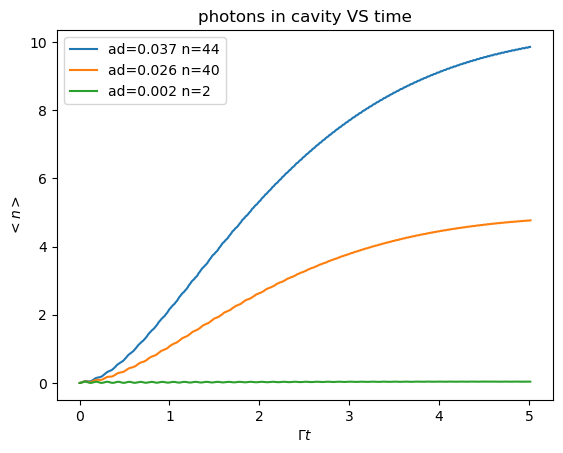

-- purcell decay rate/(2*np.pi)= 9.7e-05
-- theoretical purcell decay rate/(2*np.pi)= 0.000318


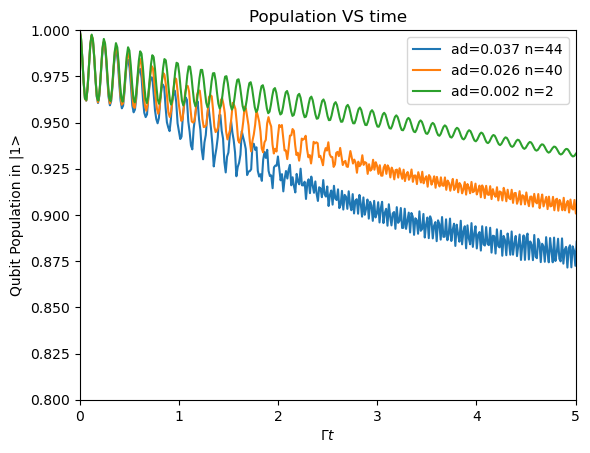

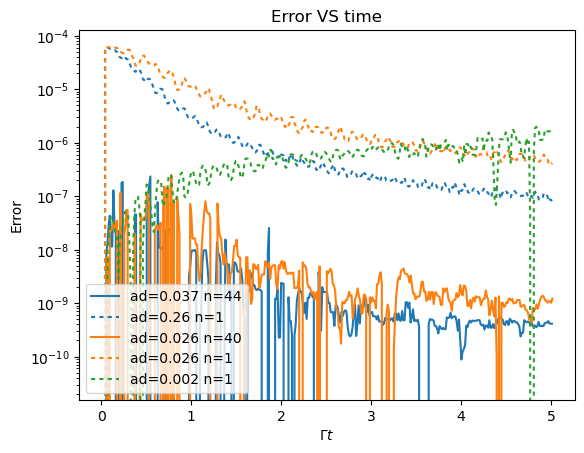

In [4]:
#-- plotting the mean photon number in the cavity
plt.plot( dyn_ad037.times*Gamma, dyn_ad037.nk[:,0], label='ad=0.037 n=44'  )
plt.plot( dyn_ad026.times*Gamma, dyn_ad026.nk[:,0], label='ad=0.026 n=40'  )
plt.plot( dyn_ad002_n2.times*Gamma, dyn_ad002_n2.nk[:,0], label='ad=0.002 n=2'  )
plt.ylabel( "$<n>$" )
plt.xlabel( "$\Gamma t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.show()

#-- plotting the population decay in the qubit
Purcell_Gamma=0.000610
print('-- purcell decay rate/(2*np.pi)=', np.round(Purcell_Gamma/(2*np.pi),6))
print('-- theoretical purcell decay rate/(2*np.pi)=', np.round( (Gamma*0.050*2*np.pi/(0.5*2*np.pi)**2)/(2*np.pi),6) )

plt.plot( dyn_ad037.times*Gamma, dyn_ad037.pplt[:,2], label='ad=0.037 n=44'  )
plt.plot( dyn_ad026.times*Gamma, dyn_ad026.pplt[:,2], label='ad=0.026 n=40'  )
plt.plot( dyn_ad002_n2.times*Gamma, dyn_ad002_n2.pplt[:,2], label='ad=0.002 n=2'  )
#plt.plot( pplt_me_ad002[:,0]*Gamma, pplt_me_ad002[:,2], label='ad=0.002 ME', c='black', dashes=[2,2,2,2]  )
#plt.plot( pplt_me_ad002[:,0]*Gamma, 0.98*exp_decay(pplt_me_ad002[:,0],Purcell_Gamma), label='ad=0.002 FIT Gamma/2pi='+str(np.round(Purcell_Gamma/(2*np.pi),6)), c='red', dashes=[2,2,2,2]  )
#plt.plot( dyn_ad002_n2.times*Gamma, exp_decay(dyn_ad002_n2.times,opt[0],opt[1]), label='ad=0.002 n=2 FIT', c='black', dashes=[2,2,2,2]  )
plt.ylabel( "Qubit Population in |1>" )
plt.xlabel( "$\Gamma t$" )
plt.title( "Population VS time"  )
plt.xlim(0,5)
plt.ylim(0.8,1)
plt.legend()
plt.show()

#-- plotting the error in the qubit state with respect to the schrodinger equaiton
plt.plot( dyn_ad037.times*Gamma, dyn_ad037.error, label='ad=0.037 n=44', c='C0'  )
plt.plot( dyn_ad037_n1.times*Gamma, dyn_ad037_n1.error, label='ad=0.26 n=1', c='C0', dashes=[2,2,2,2]  )
plt.plot( dyn_ad026.times*Gamma, dyn_ad026.error, label='ad=0.026 n=40', c='C1'  )
plt.plot( dyn_ad026_n1.times*Gamma, dyn_ad026_n1.error, label='ad=0.026 n=1', c='C1', dashes=[2,2,2,2]  )
plt.plot( dyn_ad002_n2.times*Gamma, dyn_ad002_n2.error, label='ad=0.002 n=1', c='C2', dashes=[2,2,2,2]  )
plt.ylabel( "Error" )
plt.xlabel( "$\Gamma t$" )
plt.title( "Error VS time"  )
plt.yscale( 'log' )
plt.legend()
plt.show()

## Renyi entropy between qubit and cavity

In [15]:
entropy_ad037 = dyn_ad037.final_state.renyi_entropy(0)
entropy_ad026 = dyn_ad026.final_state.renyi_entropy(0)
entropy_ad002 = dyn_ad002_n2.final_state.renyi_entropy(0)
print('entropu ad_0.037 = ',entropy_ad037)
print('entropu ad_0.026 = ',entropy_ad026)
print('entropu ad_0.002 = ',entropy_ad002)

entropu ad_0.037 =  0.512166025736808
entropu ad_0.026 =  -1.8671372750576423
entropu ad_0.002 =  -70885.25489216599


## **Bath photon spectrum**

(0.0, 0.03)

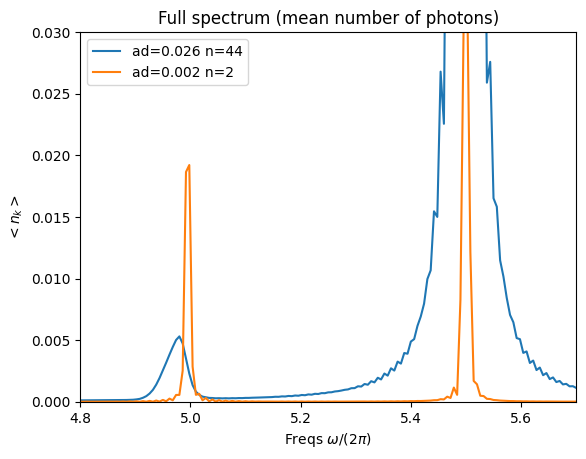

In [8]:
#plt.plot( dyn_ad037.wk/(2*(np.pi)), dyn_ad037.nk[-1,1:], label='ad=0.037 n=44'  )
plt.plot( dyn_ad026.wk/(2*(np.pi)), dyn_ad026.nk[-1,1:], label='ad=0.026 n=44'  )
plt.plot( dyn_ad002_n2.wk/(2*(np.pi)), dyn_ad002_n2.nk[-1,1:], label='ad=0.002 n=2'  )

plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()

plt.xlim(4.8,5.7)
plt.ylim( 0,0.03 )